# Pymaceuticals Inc.
---

### Analysis

- The treatment to reduce tumor sizes are Capomulin and Ramicane.
- The heavier the mouse, the heavier the tumor size. 
- Ceftamin has the largest range of tumor size reducing success ranging from 49 to 64.
 

In [586]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
fulldata_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')


# Display the data table for preview
fulldata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [587]:
# Checking the number of mice.
numberofmice = fulldata_df['Mouse ID'].nunique()
numberofmice

249

In [588]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = fulldata_df[fulldata_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [589]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemousedata = fulldata_df.loc[fulldata_df["Mouse ID"] == "g989", :]
duplicatemousedata



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [590]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = fulldata_df[fulldata_df["Mouse ID"].isin(duplicatemousedata)==False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [591]:
# Checking the number of mice in the clean DataFrame.
numberofmice2 = clean_df['Mouse ID'].nunique()
numberofmice2

249

## Summary Statistics

In [592]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meantumorvol = fulldata_df['Tumor Volume (mm3)'].groupby(fulldata_df['Drug Regimen']).mean()
mediantumorvol = fulldata_df['Tumor Volume (mm3)'].groupby(fulldata_df['Drug Regimen']).median()
variancetumorvol = fulldata_df['Tumor Volume (mm3)'].groupby(fulldata_df['Drug Regimen']).var()
stdevtumorvol = fulldata_df['Tumor Volume (mm3)'].groupby(fulldata_df['Drug Regimen']).std()
semtumorvol = fulldata_df['Tumor Volume (mm3)'].groupby(fulldata_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Turmor Volume: ": meantumorvol,
                           "Median Turmor Volume: ": mediantumorvol,
                           "Turmor Volume Variance: ": variancetumorvol,
                           "Turmor Volume Standard Deviation: ": stdevtumorvol,
                           "Turmor Volume SEM: ": semtumorvol,
                           })
summary_df

,Mean Turmor Volume:,Median Turmor Volume:,Turmor Volume Variance:,Turmor Volume Standard Deviation:,Turmor Volume SEM:
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [593]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [594]:
totalmice = fulldata_df['Drug Regimen'].value_counts()
totalmice




Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

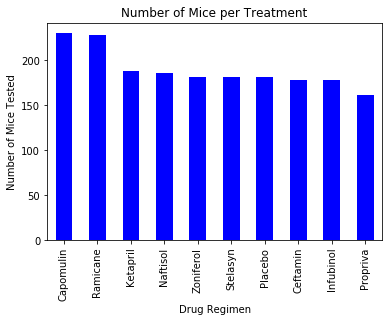

In [595]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plotpandas = totalmice.plot.bar(color="b",rot=90)
# Set the xlabel, ylabel, and title using class methods
plotpandas.set_xlabel("Drug Regimen")
plotpandas.set_ylabel("Number of Mice Tested")
plotpandas.set_title("Number of Mice per Treatment")

TypeError: 'str' object is not callable

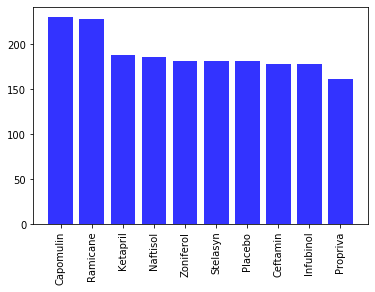

In [596]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = totalmice.index.values
y_axis = totalmice.values

plt.bar(x_axis, y_axis, color="b", alpha=0.8,align='center')
plt.xticks(rotation=90)


plt.title("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")


plt.show()

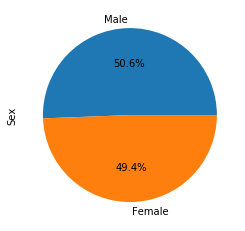

TypeError: 'str' object is not callable

In [636]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexdata = clean_df["Sex"].value_counts()
sexdata

sexdata.plot.pie(autopct=("%1.1f%%"))

plt.show()
plt.title("Female vs Male Mice")


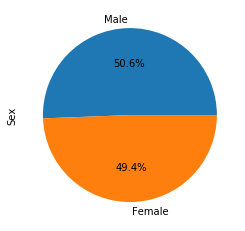

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]

sizes = [958,930]

colors = ["blue", "red"]

plot = sexdata.plot.pie(y='totalmice', autopct="%1.1f%%")

plt.title = ("Female vs Male Mice")
plt.show()



## Quartiles, Outliers and Boxplots

In [597]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulinlast = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulinvolume = pd.DataFrame(Capomulinlast)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulinmerge = pd.merge(Capomulinvolume,clean_df, on=("Mouse ID","Timepoint"), how="left")
Capomulinmerge.head()
Capomulintumor = Capomulinmerge['Tumor Volume (mm3)']

quartiles1 = Capomulintumor.quantile([0.25,0.5,0.75])
lowerq = quartiles1[0.25]
median = quartiles1[0.5]
upperq = quartiles1[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Capomulin turmos: {lowerq}.")
print(f"The median of Capomulin turmos: {median}.")
print(f"The upper quartile of Capomulin turmos: {upperq}.")
print(f"The inter quratile range of Capomulin turmos: {iqr}.")

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f"Vaules below this {lowerbound} are outliers.")
print(f"Vaules above this {upperbound} are outliers.")



The lower quartile of Capomulin turmos: 32.37735684.
The median of Capomulin turmos: 38.125164399999996.
The upper quartile of Capomulin turmos: 40.1592203.
The inter quratile range of Capomulin turmos: 7.781863460000004.
Vaules below this 20.70456164999999 are outliers.
Vaules above this 51.83201549 are outliers.


In [598]:
#Ramicane
Ramicane_data = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]

Ramicanelast = Ramicane_data.groupby('Mouse ID').max()['Timepoint']
Ramicanevolume = pd.DataFrame(Capomulinlast)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicanemerge = pd.merge(Ramicanevolume,clean_df, on=("Mouse ID","Timepoint"), how="left")
Ramicanemerge.head()
Ramicanetumor = Ramicanemerge['Tumor Volume (mm3)']

quartiles2 = Ramicanetumor.quantile([0.25,0.5,0.75])
lowerq = quartiles2[0.25]
median = quartiles2[0.5]
upperq = quartiles2[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ramicane turmos: {lowerq}.")
print(f"The median of Ramicane turmos: {median}.")
print(f"The upper quartile of Ramicane turmos: {upperq}.")
print(f"The inter quratile range of Ramicane turmos: {iqr}.")

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f"Vaules below this {lowerbound} are outliers.")
print(f"Vaules above this {upperbound} are outliers.")



The lower quartile of Ramicane turmos: 32.37735684.
The median of Ramicane turmos: 38.125164399999996.
The upper quartile of Ramicane turmos: 40.1592203.
The inter quratile range of Ramicane turmos: 7.781863460000004.
Vaules below this 20.70456164999999 are outliers.
Vaules above this 51.83201549 are outliers.


In [599]:
#Infubinol
Infubinol_data = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:] 

Infubinollast = Infubinol_data.groupby('Mouse ID').max()['Timepoint']
Infubinolvolume = pd.DataFrame(Infubinollast)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinolmerge = pd.merge(Infubinolvolume,clean_df, on=("Mouse ID","Timepoint"), how="left")
Infubinolmerge.head()
Infubinoltumor = Infubinolmerge['Tumor Volume (mm3)']

quartiles3 = Infubinoltumor.quantile([0.25,0.5,0.75])
lowerq = quartiles3[0.25]
median = quartiles3[0.5]
upperq = quartiles3[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Infubinol turmos: {lowerq}.")
print(f"The median of Infubinol turmos: {median}.")
print(f"The upper quartile of Infubinol turmos: {upperq}.")
print(f"The inter quratile range of Infubinol turmos: {iqr}.")

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f"Vaules below this {lowerbound} are outliers.")
print(f"Vaules above this {upperbound} are outliers.")


The lower quartile of Infubinol turmos: 54.04860769.
The median of Infubinol turmos: 60.16518046.
The upper quartile of Infubinol turmos: 65.52574285.
The inter quratile range of Infubinol turmos: 11.477135160000003.
Vaules below this 36.83290494999999 are outliers.
Vaules above this 82.74144559000001 are outliers.


In [600]:
#Ceftamin
Ceftamin_data = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

Ceftaminlast = Ceftamin_data.groupby('Mouse ID').max()['Timepoint']
Ceftaminvolume = pd.DataFrame(Ceftaminlast)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftaminmerge = pd.merge(Ceftaminvolume,clean_df, on=("Mouse ID","Timepoint"), how="left")
Ceftaminmerge.head()
Ceftamintumor = Ceftaminmerge['Tumor Volume (mm3)']

quartiles4 = Ceftamintumor.quantile([0.25,0.5,0.75])
lowerq = quartiles4[0.25]
median = quartiles4[0.5]
upperq = quartiles4[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ceftamin turmos: {lowerq}.")
print(f"The median of Ceftamin turmos: {median}.")
print(f"The upper quartile of Ceftamin turmos: {upperq}.")
print(f"The inter quratile range of Ceftamin turmos: {iqr}.")

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f"Vaules below this {lowerbound} are outliers.")
print(f"Vaules above this {upperbound} are outliers.")



The lower quartile of Ceftamin turmos: 48.72207785.
The median of Ceftamin turmos: 59.85195552.
The upper quartile of Ceftamin turmos: 64.29983003.
The inter quratile range of Ceftamin turmos: 15.577752179999997.
Vaules below this 25.355449580000002 are outliers.
Vaules above this 87.66645829999999 are outliers.


In [601]:

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = fulldata_df[fulldata_df["Drug Regimen"].isin(treatments)]
drugs.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [602]:
# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
lasttimepoint = lasttimepoint.stack(level=0).unstack(level=0)
for drug in treatments:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [603]:
# Create empty list to fill with tumor vol data (for plotting) ##preferred for cleaner data
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds


treatment = 0
for drug in treatments:
    quartiles = lasttimepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

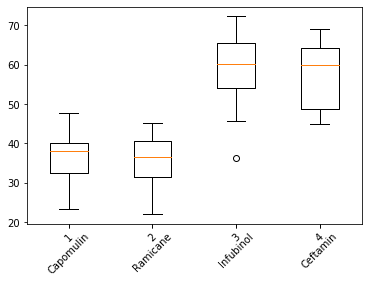

In [604]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplotlist =[]
for drug in treatments:
    boxplotlist.append(list(lasttimepoint[drug].dropna()))
    
fig = plt.figure()
plt.xlabel = ("Treatment Regimen")
plt.xticks([1,2,3,4], treatments, rotation = 45)
plt.ylabel = ("Tumor voume")
plt.title = ("Tumor volume by Treatment Regimen")
plt.boxplot(boxplotlist)
plt.show()

## Line and Scatter Plots

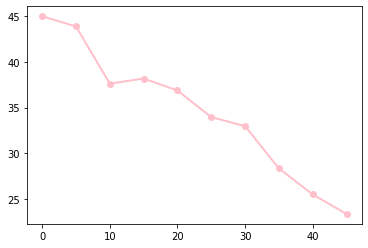

In [630]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
linedata = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185",:]
linedata.head()
x_axis = linedata["Timepoint"]
tumsize = linedata["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()

plt.plot(x_axis, tumsize,linewidth=2,marker="o",color="pink")
#plt.title('Capomulin treatmeant of mouse l509')
#plt.xlabel('Timepoint')
#plt.ylabel("Tumor Volume (mm3)")


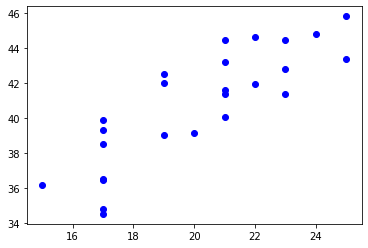

In [628]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avgcapmvol =Capomulin_df.groupby(['Mouse ID']).mean()


plt.scatter(avgcapmvol['Weight (g)'],avgcapmvol['Tumor Volume (mm3)'], color="blue")
#plt.title('Mouse Weight Versus Average Tumor Volume')
#plt.xlabel('Weight (g)')
#plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [621]:
# Calculate the correlation coefficient and linear regression model 

correlation = st.pearsonr(avgcapmvol['Weight (g)'],avgcapmvol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")



The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


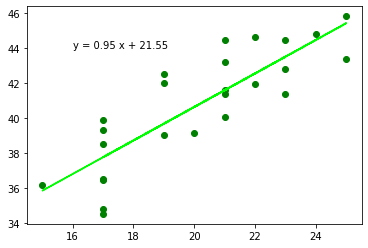

In [634]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avgcapmvol["Weight (g)"],avgcapmvol["Tumor Volume (mm3)"])
regress_values=avgcapmvol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avgcapmvol["Weight (g)"],avgcapmvol["Tumor Volume (mm3)"],color='green')
plt.plot(avgcapmvol["Weight (g)"], regress_values, color='lime')
plt.annotate(line_eq,(16,44))
#plt.xlabel("Weight (g)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()